# IMPORT LIBRARIES

In [894]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

# IMPORT DATASETS

In [895]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [896]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [897]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [898]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [899]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [900]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [901]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [902]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [903]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [904]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [905]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [906]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


In [907]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,0.253165,2.529553,1.156416,3.511040,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.196209,0.812991,0.669267,0.692113,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.047837,0.049742,0.002297,0.832909,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,0.122218,2.054124,0.604316,3.044522,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,0.182322,2.639057,1.098612,3.496508,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,0.314811,3.091042,1.620376,3.970292,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,2.302585,10.165890,4.044804,10.373522,1350.000000,6.311735,7.741099,487.000000


# FEATURE ENGINEERING

## Interaction Feature

In [908]:
def feat_eng(df):
    df["CaMg_Interaction"] = df["Calcium"] * 2.5 + df["Magnesium"] * 4
    df["AlkalinMg_Interaction"] = df["Alkalinity, total"] * df["Magnesium"]
    df["AlkalinCa_Interaction"] = df["Alkalinity, total"] * df["Calcium"]
    df["NaMg_Interaction"] = df["Sodium"] * df["Magnesium"]

In [909]:
feat_eng(clean_train_df)

## LABEL CORRELATION

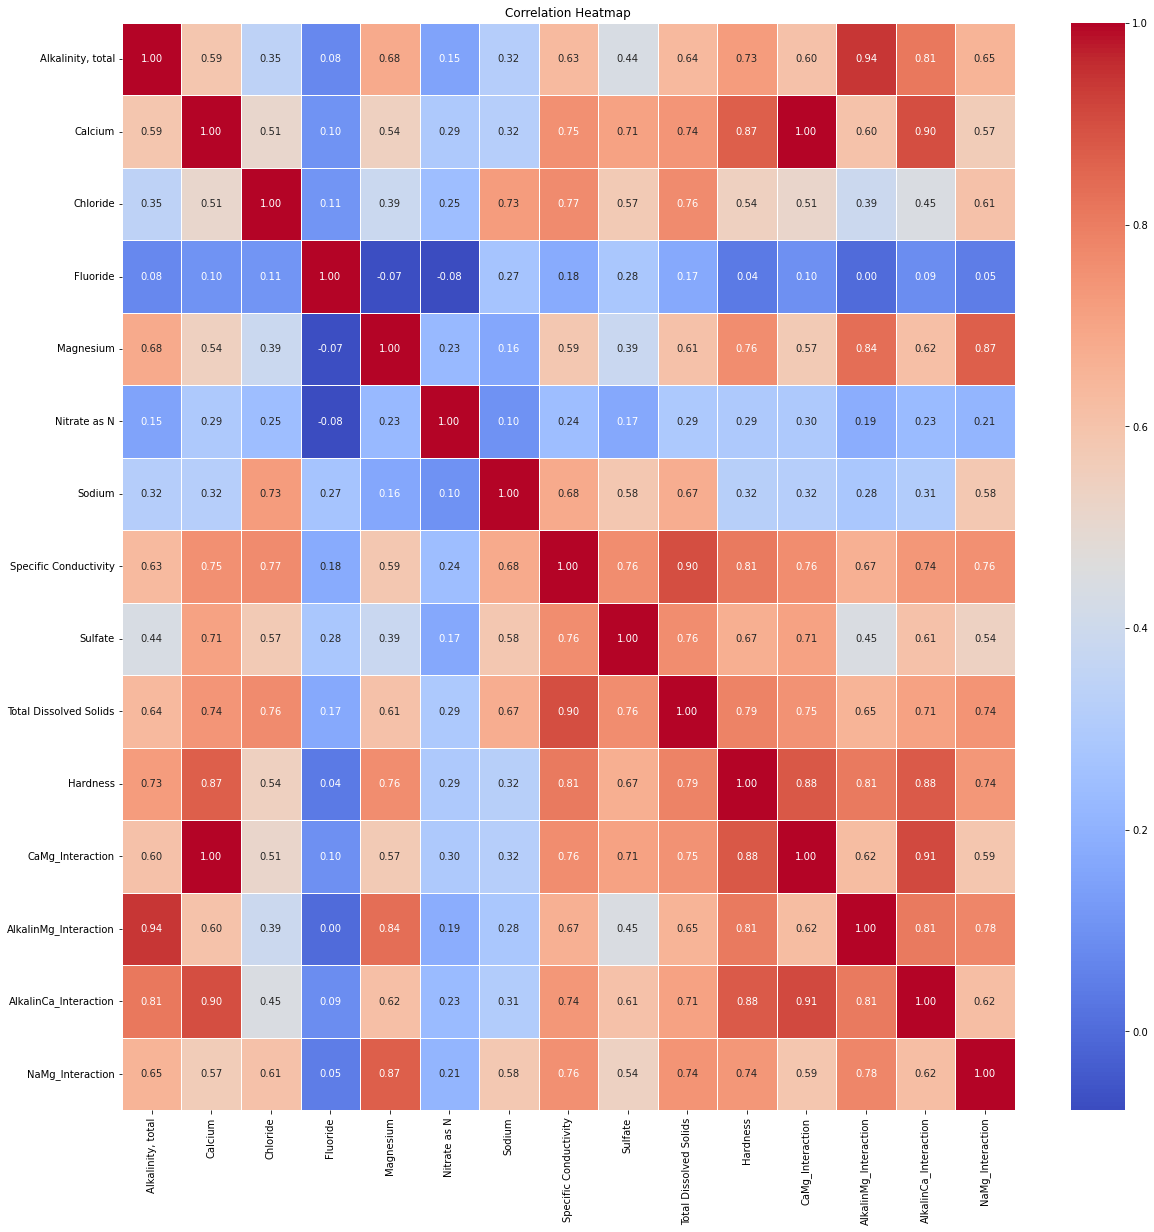

In [910]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [911]:
correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"]

Alkalinity, total         0.726215
Calcium                   0.868447
Chloride                  0.543349
Magnesium                 0.763389
Specific Conductivity     0.808687
Sulfate                   0.669405
Total Dissolved Solids    0.787012
Hardness                  1.000000
CaMg_Interaction          0.880958
AlkalinMg_Interaction     0.807486
AlkalinCa_Interaction     0.876396
NaMg_Interaction          0.738119
Name: Hardness, dtype: float64

In [912]:
final_feat = correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"].index.tolist()

In [913]:
final_feat

['Alkalinity, total',
 'Calcium',
 'Chloride',
 'Magnesium',
 'Specific Conductivity',
 'Sulfate',
 'Total Dissolved Solids',
 'Hardness',
 'CaMg_Interaction',
 'AlkalinMg_Interaction',
 'AlkalinCa_Interaction',
 'NaMg_Interaction']

In [914]:
clean_train_df = clean_train_df[final_feat]

## Split Feature

In [915]:
X = clean_train_df.drop(columns=['Hardness'])
y = clean_train_df['Hardness']

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [916]:
y.describe()

count    5770.000000
mean      181.621282
std       105.101574
min         3.500000
25%        99.000000
50%       160.000000
75%       250.000000
max       487.000000
Name: Hardness, dtype: float64

In [917]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# MODEL CREATION

In [1038]:
ori_df = train_df.copy()
feat_eng(ori_df)

In [1039]:
X_ori = ori_df[X.columns]
y_ori = ori_df['Hardness']

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_ori_pca = pca.fit_transform(X_ori)

X_ori_train, X_ori_val, y_ori_train, y_ori_val = train_test_split(X_ori, y_ori, train_size=0.8, random_state=42)

In [1040]:
X_ori_train

,"Alkalinity, total",Calcium,Chloride,Magnesium,Specific Conductivity,Sulfate,Total Dissolved Solids,CaMg_Interaction,AlkalinMg_Interaction,AlkalinCa_Interaction,NaMg_Interaction
1859,280.0,82.0,55.0,41.0,870.0,77.0,550.0,369.0,11480.0,22960.0,1681.0
3238,110.0,61.0,64.0,8.3,540.0,140.0,410.0,185.7,913.0,6710.0,415.0
5179,150.0,32.0,19.0,13.0,340.0,8.4,240.0,132.0,1950.0,4800.0,273.0
2646,130.0,78.0,43.0,18.0,720.0,120.0,450.0,267.0,2340.0,10140.0,432.0
5676,61.0,13.0,8.8,6.6,170.0,9.1,210.0,58.9,402.6,793.0,105.6
...,...,...,...,...,...,...,...,...,...,...,...
3772,170.0,50.0,17.0,13.0,573.0,46.0,310.0,177.0,2210.0,8500.0,611.0
5191,130.0,41.0,52.0,21.0,620.0,61.0,380.0,186.5,2730.0,5330.0,1281.0
5226,77.0,25.0,27.0,7.5,370.0,7.7,260.0,92.5,577.5,1925.0,270.0
5390,180.0,56.0,16.0,15.0,460.0,22.0,300.0,200.0,2700.0,10080.0,300.0


In [1041]:
X_train

,"Alkalinity, total",Calcium,Chloride,Magnesium,Specific Conductivity,Sulfate,Total Dissolved Solids,CaMg_Interaction,AlkalinMg_Interaction,AlkalinCa_Interaction,NaMg_Interaction
2662,44.0,4.7,1.740466,1.252763,140.0,0.993252,5.141664,16.761052,55.121571,206.8,3.112999
5770,190.0,36.0,2.014903,2.484907,380.0,1.667707,5.398163,99.939627,472.132263,6840.0,7.565354
3169,100.0,31.0,3.526361,2.091864,320.0,2.001480,5.484797,85.867456,209.186406,3100.0,6.733451
6385,160.0,40.0,3.258097,2.833213,430.0,2.708050,5.638355,111.332853,453.314135,6400.0,9.540267
3089,150.0,71.0,4.615121,2.833213,755.0,4.110874,6.111467,188.832853,424.982002,10650.0,11.248684
...,...,...,...,...,...,...,...,...,...,...,...
4190,150.0,36.0,3.091042,2.995732,450.0,3.295837,5.771441,101.982929,449.359841,5400.0,9.393101
5762,160.0,44.0,2.292535,1.945910,330.0,2.351375,5.141664,117.783641,311.345624,7040.0,5.729614
5800,60.0,11.0,2.564949,0.095310,213.0,2.995732,5.081404,27.881241,5.718611,660.0,0.338806
5983,150.0,30.0,1.987874,2.564949,280.0,2.197225,5.442418,85.259797,384.742404,4500.0,7.928367


## Linear Regression

In [1042]:
# Scale the features
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_train)
y_val_pred = linear_reg.predict(X_val)

In [1043]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred)
print(r2)

0.918398311025545


## Decision Tree

In [1044]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_train_scaled)

In [1045]:
r2 = r2_score(y_train, y_pred)
print(r2)

1.0


In [1046]:
cv_scores = cross_val_score(dt, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.81232846 0.8444188  0.77379976 0.85372267 0.78530492]
Average score 0.8139149229573928


In [1047]:
# Define the objective function
from sklearn.metrics import make_scorer

def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Create the model
    dt = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Perform cross-validation
    scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # We aim to maximize the R² score
    return scores.mean()

# Create the study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [1048]:
# best_params = study.best_params
# print("Best parameters:", best_params)

In [1049]:
best_params = {'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 13}

In [1050]:
dt_optimized = DecisionTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

In [1121]:
dt_optimized.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=13, min_samples_split=11,
                      random_state=42)

In [1051]:
cv_scores = cross_val_score(dt_optimized, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.82271025 0.87345913 0.80334529 0.88219814 0.86113085]
Average score 0.8485687348217791


## Random Forest

In [1129]:
# best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1} 

In [1131]:
from sklearn.ensemble import RandomForestRegressor


# best_params['random_state'] = 42
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_train_scaled)

In [1132]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9888918048277702


In [1133]:
cv_scores = cross_val_score(random_forest, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.89064649 0.92313445 0.8262232  0.93473905 0.89517266]
Average score 0.8939831692363038


In [1134]:
# Define the objective function
from sklearn.metrics import make_scorer

def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 1, 100)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Create the model
    random_forest = RandomForestRegressor(
        n_estimators = n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Perform cross-validation
    scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # We aim to maximize the R² score
    return scores.mean()

# Create the study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

In [1135]:
# best_params = study.best_params
# print("Best parameters:", best_params)

In [1136]:
best_params = {'n_estimators': 45, 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 8}

In [1137]:
rf_optimized = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

In [1138]:
rf_optimized.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=17,
                      random_state=42)

In [1139]:
cv_scores = cross_val_score(rf_optimized, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.87944827 0.91848543 0.8300355  0.93554444 0.89203449]
Average score 0.8911096252810211


## ExtraTree

In [1140]:
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(random_state=42)
extra_tree.fit(X_train_scaled, y_train)

y_pred = extra_tree.predict(X_train_scaled)

In [1141]:
r2 = r2_score(y_train, y_pred)
print(r2)

1.0


In [1142]:
cv_scores = cross_val_score(extra_tree, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.82256661 0.80079019 0.75938717 0.87224155 0.76706537]
Average score 0.8044101815885399


In [1143]:
# Define the objective function
from sklearn.metrics import make_scorer

def objective(trial):
    # Suggest hyperparameters
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    
    # Create the model
    dt = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Perform cross-validation
    scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # We aim to maximize the R² score
    return scores.mean()

# Create the study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [1144]:
# best_params = study.best_params
# print("Best parameters:", best_params)

In [1145]:
best_params = {'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 11}

In [1146]:
et_optimized = ExtraTreeRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)

In [1147]:
cv_scores = cross_val_score(et_optimized, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.82502769 0.87671445 0.78385967 0.89357577 0.83945823]
Average score 0.8437271624010589


## GradientBoostingRegressor

In [1148]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_train_scaled)

In [1149]:
r2 = r2_score(y_train, y_pred)
print(r2)

0.9457940426877819


In [1150]:
cv_scores = cross_val_score(extra_tree, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.82256661 0.80079019 0.75938717 0.87224155 0.76706537]
Average score 0.8044101815885399


In [1151]:
# Define the objective function
def objective(trial):
    # Suggest hyperparameters for GradientBoostingRegressor
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 1, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    
    # Create the model
    gbr = GradientBoostingRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )
    
    # Perform cross-validation
    scores = cross_val_score(gbr, X_train_scaled, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # We aim to maximize the R² score
    return scores.mean()

# Create the study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

In [1152]:
# best_params = study.best_params
# print("Best parameters:", best_params)

In [1153]:
best_params = {'n_estimators': 252, 'max_depth': 1, 'learning_rate': 0.07649323835272154, 'min_samples_split': 7, 'min_samples_leaf': 9, 'subsample': 0.681617075973117}

In [1154]:
gbr_optimized = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    subsample=best_params['subsample'],
    random_state=42
)

In [1155]:
gbr_optimized.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.07649323835272154, max_depth=1,
                          min_samples_leaf=9, min_samples_split=7,
                          n_estimators=252, random_state=42,
                          subsample=0.681617075973117)

In [1156]:
cv_scores = cross_val_score(gbr_optimized, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.89256703 0.91834086 0.84516156 0.94097946 0.89709153]
Average score 0.898828090902797


## KNN

In [1157]:
from sklearn import neighbors

rmse_val = [] 
for K in range(20):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_val) 
    r2 = r2_score(y_val, y_pred)
    print(f"K = {K} dengan r2 = {r2}")

K = 1 dengan r2 = 0.7691340350803512
K = 2 dengan r2 = 0.8084236184797894
K = 3 dengan r2 = 0.8241882019951368
K = 4 dengan r2 = 0.832017864502022
K = 5 dengan r2 = 0.8356985896828776
K = 6 dengan r2 = 0.8384192819012963
K = 7 dengan r2 = 0.8410025221735494
K = 8 dengan r2 = 0.8386307380445825
K = 9 dengan r2 = 0.8370213341217551
K = 10 dengan r2 = 0.8382997745864978
K = 11 dengan r2 = 0.8401367389999287
K = 12 dengan r2 = 0.8398610956676519
K = 13 dengan r2 = 0.840612727543262
K = 14 dengan r2 = 0.8400739561576218
K = 15 dengan r2 = 0.8394073325686064
K = 16 dengan r2 = 0.8404783718110058
K = 17 dengan r2 = 0.8411742648236372
K = 18 dengan r2 = 0.8409001980917352
K = 19 dengan r2 = 0.8409709494488143
K = 20 dengan r2 = 0.8402128075263583


In [1158]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 11)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

## STACK: RF, KNN

In [1159]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('Random Forest', random_forest),
              ('KNN', knn)]

stacking_regressor_rf_knn = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [1160]:
stacking_regressor_rf_knn.fit(X_train, y_train) 
y_pred = stacking_regressor_rf_knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

KeyboardInterrupt: 

## STACK: KNN, RF

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV


estimators = [('KNN', knn),
              ('Random Forest', random_forest)]

stacking_regressor_knn_rf = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())

In [ ]:
stacking_regressor_knn_rf.fit(X_train, y_train) 
y_pred = stacking_regressor_knn_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9110417734873328


In [ ]:
cv_scores = cross_val_score(stacking_regressor_knn_rf, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.89005546 0.92254473 0.82830308 0.93439523 0.89401417]
Average score 0.893862535786964


## XGB

In [ ]:
import xgboost as xgb

xgb_r = xgb.XGBRegressor(n_estimators=25, 
                         objective="reg:squarederror", 
                         eval_metric="rmse",
                         learning_rate=0.2, 
                         random_state=0)

xgb_r.fit(X_train, y_train,
          verbose=5)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
y_pred = xgb_r.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9167970001983097


## STACK: RF, XGBR

In [1190]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor()
rf = RandomForestRegressor()

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [1167]:
stacking_regressor_xgb_rf = StackingCVRegressor(regressors=(xgb, rf),
                            meta_regressor=rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_xgb_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=RandomForestRegressor(), random_state=42,
                    regressors=(XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_...
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...),
                                RandomForestRegressor()),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [1168]:
y_pred = stacking_regressor_rf_xgb.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
y_pred = stacking_regressor_xgb_rf.predict(X_val) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9069640742215559


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# cv_scores = cross_val_score(stacking_regressor_rf_xgb, X_val, y_val, cv=5, scoring='r2')

# print("Cross-validation scores:", cv_scores)
# print("Average score", cv_scores.mean())

In [ ]:
# cv_scores = cross_val_score(stacking_regressor_xgb_rf, X_val, y_val, cv=5, scoring='r2')

# print("Cross-validation scores:", cv_scores)
# print("Average score", cv_scores.mean())

## STACK: RF, XGBR, KNN

In [ ]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

stacking_regressor_rf_xgb_knn = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=knn, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb_knn.fit(X_train_scaled, y_train)

StackingCVRegressor(meta_regressor=KNeighborsRegressor(n_neighbors=11),
                    random_state=42,
                    regressors=(RandomForestRegressor(),
                                XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gam...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=None, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
y_pred = stacking_regressor_rf_xgb_knn.predict(X_val_scaled) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.9089027252995805


In [ ]:
cv_scores = cross_val_score(stacking_regressor_rf_xgb_knn, X_ori_val, y_ori_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Cross-validation scores: [0.79636645 0.81544673 0.85813874 0.76279229 0.84765249]
Average score 0.8160793409744335


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## ADABOOST

In [1169]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(X_train_scaled, y_train)

y_pred = abr.predict(X_val_scaled) 
r2 = r2_score(y_val, y_pred)
print(r2)

0.7931322604215056


In [1178]:
# Define the objective function
def objective(trial):
    # Suggest hyperparameters for AdaBoostRegressor
    estimator = trial.suggest_categorical('estimator', [dt_optimized, random_forest, knn, xgb_r])
    n_estimators = trial.suggest_int('n_estimators', 0,100)
    learning_rate = trial.suggest_float('learning_rate', 0,1)
    loss = trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
    
    
    # Create the model
    abr = AdaBoostRegressor(
        loss = loss,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        estimator=estimator,
        # criterion=criterion,
        random_state=42
    )
    
    # Perform cross-validation
    scores = cross_val_score(abr, X_train_scaled, y_train, cv=5, scoring=make_scorer(r2_score))
    
    # We aim to maximize the R² score
    return scores.mean()

# Create the study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

[I 2024-06-29 19:00:24,730] A new study created in memory with name: no-name-e8512b94-c21e-4ee8-8c3a-bd0e4f6a23f4
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains DecisionTreeRegressor(max_depth=6, min_samples_leaf=13, min_samples_split=11,
                      random_state=42) which is of type DecisionTreeRegressor.
  warnings.warn(message)
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains RandomForestRegressor(random_state=42) which is of type RandomForestRegressor.
  warnings.warn(message)
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:524: UserWarning: Choi

In [1179]:
best_params = study.best_params
print("Best parameters:", best_params)

Best parameters: {'estimator': DecisionTreeRegressor(max_depth=6, min_samples_leaf=13, min_samples_split=11,
                      random_state=42), 'n_estimators': 16, 'learning_rate': 0.5304740519183856, 'loss': 'exponential'}


In [1180]:
best_params = {'estimator': DecisionTreeRegressor(max_depth=6, min_samples_leaf=13, min_samples_split=11,
                      random_state=42), 'n_estimators': 16, 'learning_rate': 0.5304740519183856, 'loss': 'exponential'}

In [1181]:
abr_optimized = AdaBoostRegressor(**best_params)

In [1182]:
abr_optimized.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6,
                                                  min_samples_leaf=13,
                                                  min_samples_split=11,
                                                  random_state=42),
                  learning_rate=0.5304740519183856, loss='exponential',
                  n_estimators=16)

In [1183]:
cv_scores = cross_val_score(abr_optimized, X_val_scaled, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.87527147 0.90357131 0.8265869  0.91751094 0.89105961]
Average score 0.8828000448596471


## Neural Network

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import optuna

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasRegressor

random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

In [ ]:
# import numpy as np
# import optuna
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping

# # Define R² metric function
# def r2_score(y_true, y_pred):
#     SS_res = np.sum((y_true - y_pred) ** 2)
#     SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#     return 1 - SS_res / (SS_tot + np.finfo(float).eps)

# # Assuming X_train and y_train are defined and loaded
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# def objective_neural_network(trial):
#     layer_1 = trial.suggest_int("layer_1", 2, 8)
#     layer_2 = trial.suggest_int("layer_2", 2, 8)
#     layer_3 = trial.suggest_int("layer_3", 2, 8)
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
#     epoch = trial.suggest_int("epoch", 10, 50)
#     batch_size = trial.suggest_int("batch_size", 1, 100)
#     optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

#     optimizer_map = {
#         'Adadelta': Adadelta(learning_rate=learning_rate),
#         'Adagrad': Adagrad(learning_rate=learning_rate),
#         'Adam': Adam(learning_rate=learning_rate),
#         'RMSprop': RMSprop(learning_rate=learning_rate),
#         'SGD': SGD(learning_rate=learning_rate)
#     }

#     optimizer = optimizer_map[optimizer_name]

#     neural_network = Sequential()
#     neural_network.add(Dense(layer_1, input_shape=(X_train_scaled.shape[1],), activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_2, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(layer_3, activation='relu'))
#     neural_network.add(Dropout(dropout_rate))
#     neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

#     neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])

#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#     neural_network.fit(X_train_scaled, y_train, epochs=epoch, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping], verbose=0)

#     y_pred = neural_network.predict(X_train_scaled).flatten()  # Ensure y_pred is 1-dimensional
#     r2 = r2_score(y_train, y_pred)
    
#     return r2

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_neural_network, n_trials=10)

# print("Best value (R²):", study.best_value)
# print("Best parameters:", study.best_params)


In [ ]:
# import numpy as np
# import optuna
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_absolute_error
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adadelta, Adagrad, Adam, RMSprop, SGD
# from tensorflow.keras.callbacks import EarlyStopping
# from scikeras.wrappers import KerasRegressor
# from sklearn.model_selection import cross_val_score

# # Define R² metric function
# def r2_score(y_true, y_pred):
#     SS_res = np.sum((y_true - y_pred) ** 2)
#     SS_tot = np.sum((y_true - np.mean(y_true)) ** 2)
#     return 1 - SS_res / (SS_tot + np.finfo(float).eps)

# # Assuming X_train and y_train are defined and loaded
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# def objective_neural_network(trial):
#     layer_1 = trial.suggest_int("layer_1", 2, 8)
#     layer_2 = trial.suggest_int("layer_2", 2, 8)
#     layer_3 = trial.suggest_int("layer_3", 2, 8)
#     learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
#     dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5)
#     epoch = trial.suggest_int("epoch", 10, 50)
#     batch_size = trial.suggest_int("batch_size", 1, 100)
#     optimizer_name = trial.suggest_categorical("optimizer", ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD'])

#     optimizer_map = {
#         'Adadelta': Adadelta(learning_rate=learning_rate),
#         'Adagrad': Adagrad(learning_rate=learning_rate),
#         'Adam': Adam(learning_rate=learning_rate),
#         'RMSprop': RMSprop(learning_rate=learning_rate),
#         'SGD': SGD(learning_rate=learning_rate)
#     }

#     def create_model_opt():
#         optimizer = optimizer_map[optimizer_name]

#         neural_network = Sequential()
#         neural_network.add(Dense(layer_1, input_shape=(X_train_scaled.shape[1],), activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(layer_2, activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(layer_3, activation='relu'))
#         neural_network.add(Dropout(dropout_rate))
#         neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

#         neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_absolute_error'])
#         return neural_network

#     # Create KerasRegressor
#     neural_network = KerasRegressor(build_fn=create_model_opt, epochs=epoch, batch_size=batch_size, verbose=0)

#     # Perform cross-validation
#     cv_scores = cross_val_score(neural_network, X_train_scaled, y_train, cv=3, scoring='r2')

#     print("Cross-validation scores:", cv_scores)
#     print("Average score", cv_scores.mean())
    
#     return cv_scores.mean()

# study = optuna.create_study(direction='maximize')
# study.optimize(objective_neural_network, n_trials=20)

# print("Best value (cv R²):", study.best_value)
# print("Best parameters:", study.best_params)


In [ ]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

# Define R² metric function using TensorFlow
def tf_r2_score(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Assuming X_train and y_train are defined and loaded


# Best parameters from Optuna
params = {
    'layer_1': 7,
    'layer_2': 2,
    'layer_3': 5,
    'learning_rate': 0.018708417846516115,
    'dropout_rate': 0.0022822336772516688,
    'epoch': 75,
    'batch_size': 10,
    'optimizer': 'Adam'
}

def create_model():
    # Optimizer
    optimizer = Adam(learning_rate=params['learning_rate'])
    # Define the neural network model
    neural_network = Sequential()
    neural_network.add(Dense(params['layer_1'], input_shape=(X_train_scaled.shape[1],), activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(params['layer_2'], activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(params['layer_3'], activation='relu'))
    neural_network.add(Dropout(params['dropout_rate']))
    neural_network.add(Dense(1, activation='linear'))  # Use 'linear' activation for regression

    neural_network.compile(loss='mean_squared_error', optimizer=optimizer, metrics=[tf_r2_score])
    return neural_network

neural_network = KerasRegressor(model=create_model, epochs=48, batch_size=13, verbose=0)

# Early stopping
early_stopping = EarlyStopping(monitor='val_tf_r2_score', patience=5, restore_best_weights=True)

# Train the model
neural_network.fit(X_train_scaled, y_train, epochs=params['epoch'], batch_size=params['batch_size'], validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Predict and evaluate
y_pred = neural_network.predict(X_train_scaled).flatten()  # Ensure y_pred is 1-dimensional
r2 = tf_r2_score(tf.convert_to_tensor(y_train, dtype=tf.float32), tf.convert_to_tensor(y_pred, dtype=tf.float32))

print("R² on training data:", r2.numpy())


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 17399.9785 - tf_r2_score: -31.0749 - val_loss: 1075.4192 - val_tf_r2_score: -18.3477
Epoch 2/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1475.9965 - tf_r2_score: -19.1047 - val_loss: 1004.6425 - val_tf_r2_score: -18.5773
Epoch 3/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1399.5347 - tf_r2_score: -18.8229 - val_loss: 1011.7998 - val_tf_r2_score: -18.6306
Epoch 4/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1049.3638 - tf_r2_score: -18.6879 - val_loss: 985.8386 - val_tf_r2_score: -18.6122
Epoch 5/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1100.1686 - tf_r2_score: -18.7185 - val_loss: 988.7525 - val_tf_r2_score: -18.7438
Epoch 6/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1025.3131 - tf_r2_score: -18.6766 - val_loss: 994.5554 - val_tf_r2_score: -18.3919
Epoch 7/75
370/370 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1033.7566 - tf_r2_score: -18.6857 - val_loss: 1016.0177 - val_tf_r2_score: -18

In [ ]:
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)
random.seed(random_state)

cv_scores = cross_val_score(neural_network, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in th

KeyboardInterrupt: 

## MLP

In [1206]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

mlp.fit(X_train_scaled, y_train)

c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

## SVR

In [1197]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train_scaled, y_train)

SVR()

In [1198]:
cv_scores = cross_val_score(svr, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Cross-validation scores: [0.69000109 0.69755009 0.65284215 0.68311303 0.65375155]
Average score 0.675451580287476


In [1199]:
from sklearn.ensemble import BaggingRegressor

bag_svr = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

bag_svr.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_svr = bag_svr.predict(X_train)
y_predval_bag_svr = bag_svr.predict(X_val)
r2train_bag_svr = r2_score(y_train, y_predtrain_bag_svr)
r2val_bag_svr = r2_score(y_val, y_predval_bag_svr)
print(f"bag_svr r2 train =  {r2train_bag_svr}, bag_svr r2 val = {r2val_bag_svr}, bag_svr r2 diff = {r2train_bag_svr-r2val_bag_svr}")

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_xgbr = BaggingRegressor(estimator=xgb_r, n_estimators=10, random_state=42)

bag_xgbr.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_xgbr = bag_xgbr.predict(X_train)
y_predval_bag_xgbr = bag_xgbr.predict(X_val)
r2train_bag_xgbr = r2_score(y_train, y_predtrain_bag_xgbr)
r2val_bag_xgbr = r2_score(y_val, y_predval_bag_xgbr)
print(f"bag_xgbr r2 train =  {r2train_bag_xgbr}, bag_xgbr r2 val = {r2val_bag_xgbr}, bag_xgbr r2 diff = {r2train_bag_xgbr-r2val_bag_xgbr}")

bag_xgbr r2 train =  0.8953093038876484, bag_xgbr r2 val = 0.8283961919739317, bag_xgbr r2 diff = 0.06691311191371674


In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_rf = BaggingRegressor(estimator=random_forest, n_estimators=10, random_state=42)

bag_rf.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_rf = bag_rf.predict(X_train)
y_predval_bag_rf = bag_rf.predict(X_val)
r2train_bag_rf = r2_score(y_train, y_predtrain_bag_rf)
r2val_bag_rf = r2_score(y_val, y_predval_bag_rf)
print(f"bag_rf r2 train =  {r2train_bag_rf}, bag_rf r2 val = {r2val_bag_rf}, bag_rf r2 diff = {r2train_bag_rf-r2val_bag_rf}")

bag_rf r2 train =  0.9411544437005273, bag_rf r2 val = 0.8248507434839574, bag_rf r2 diff = 0.11630370021656988


In [ ]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.8672873538946317, bag_knn r2 val = 0.8252390760288671, bag_knn r2 diff = 0.042048277865764594


In [ ]:
from mlxtend.regressor import StackingCVRegressor

stack_bagall_rf_knn_xgbr_rf = StackingCVRegressor(regressors=(bag_rf, bag_knn, bag_xgbr),
                            meta_regressor=bag_rf, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack_bagall_rf_knn_xgbr_rf.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=BaggingRegressor(estimator=RandomForestRegressor(max_depth=32,
                                                                                    n_estimators=76,
                                                                                    random_state=42),
                                                    random_state=42),
                    random_state=42,
                    regressors=(BaggingRegressor(estimator=RandomForestRegressor(max_depth=32,
                                                                                 n_estimators=76,
                                                                                 random_state=42),
                                                 random_state=42),
                                BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=11),...
                                                                        max_bin=None,
                                                                        max_cat_threshold=None,
                                                                        max_cat_to_onehot=None,
                                                                        max_delta_step=None,
                                                                        max_depth=None,
                                                                        max_leaves=None,
                                                                        min_child_weight=None,
                                                                        missing=nan,
                                                                        monotone_constraints=None,
                                                                        multi_strategy=None,
                                                                        n_estimators=25,
                                                                        n_jobs=None,
                                                                        num_parallel_tree=None,
                                                                        random_state=0, ...),
                                                 random_state=42)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
from mlxtend.regressor import StackingCVRegressor

stack_bagrf_xgbr = StackingCVRegressor(regressors=(bag_rf, xgb_r),
                            meta_regressor=xgb_r, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack_bagrf_xgbr.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric='rmse',
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_ra...
                                             learning_rate=0.2, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=25, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=0, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [ ]:
cv_scores = cross_val_score(stack_bagrf_xgbr, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

KeyboardInterrupt: 

In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

Learning rate set to 0.052136
0:	learn: 101.6094620	total: 3.94ms	remaining: 3.94s
1:	learn: 98.0375313	total: 5.69ms	remaining: 2.84s
2:	learn: 94.8655465	total: 7.73ms	remaining: 2.57s
3:	learn: 91.7651926	total: 10ms	remaining: 2.49s
4:	learn: 88.9012463	total: 11.6ms	remaining: 2.3s
5:	learn: 86.1800907	total: 13.3ms	remaining: 2.21s
6:	learn: 83.6934519	total: 15.1ms	remaining: 2.15s
7:	learn: 81.3392409	total: 16.8ms	remaining: 2.09s
8:	learn: 79.1211796	total: 18.6ms	remaining: 2.04s
9:	learn: 77.0678611	total: 20.4ms	remaining: 2.02s
10:	learn: 75.1863699	total: 22.1ms	remaining: 1.99s
11:	learn: 73.3892308	total: 23.9ms	remaining: 1.97s
12:	learn: 71.7200994	total: 25.6ms	remaining: 1.94s
13:	learn: 70.1936544	total: 27.9ms	remaining: 1.96s
14:	learn: 68.7429128	total: 29.7ms	remaining: 1.95s
15:	learn: 67.4455217	total: 31.5ms	remaining: 1.94s
16:	learn: 66.2538427	total: 33.7ms	remaining: 1.95s
17:	learn: 65.1276335	total: 35.7ms	remaining: 1.95s
18:	learn: 64.0622559	total:

In [ ]:
cv_scores = cross_val_score(catboost, X_val, y_val, cv=5, scoring='r2')

print("Cross-validation scores:", cv_scores)
print("Average score", cv_scores.mean())

Learning rate set to 0.040428
0:	learn: 102.4118648	total: 1.97ms	remaining: 1.96s
1:	learn: 99.8973496	total: 2.98ms	remaining: 1.49s
2:	learn: 97.5123869	total: 3.98ms	remaining: 1.32s
3:	learn: 95.2434247	total: 4.93ms	remaining: 1.23s
4:	learn: 93.1917905	total: 5.89ms	remaining: 1.17s
5:	learn: 91.1308396	total: 6.79ms	remaining: 1.13s
6:	learn: 89.1045975	total: 7.95ms	remaining: 1.13s
7:	learn: 87.3179337	total: 8.96ms	remaining: 1.11s
8:	learn: 85.5090334	total: 9.93ms	remaining: 1.09s
9:	learn: 83.8751311	total: 10.9ms	remaining: 1.08s
10:	learn: 82.2419619	total: 12ms	remaining: 1.07s
11:	learn: 80.7926017	total: 12.9ms	remaining: 1.06s
12:	learn: 79.3505592	total: 14.2ms	remaining: 1.07s
13:	learn: 78.1050879	total: 15.1ms	remaining: 1.06s
14:	learn: 76.8654065	total: 16.2ms	remaining: 1.06s
15:	learn: 75.6309127	total: 17.2ms	remaining: 1.06s
16:	learn: 74.5182011	total: 18.1ms	remaining: 1.05s
17:	learn: 73.3640528	total: 19ms	remaining: 1.04s
18:	learn: 72.3038635	total: 

# SUBMISSION

In [1200]:
test_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,CaMg_Interaction,AlkalinMg_Interaction,AlkalinCa_Interaction,NaMg_Interaction
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0,87.35,1106.70,1478.7,151.13
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0,117.80,1476.00,6120.0,2460.00
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0,123.20,313.50,4180.0,92.40
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0,96.50,660.00,3190.0,138.00
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0,327.50,8055.00,10561.0,2880.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0,87.80,281.60,2640.0,76.80
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0,55.22,43.52,1344.0,21.08
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0,176.00,5040.00,6720.0,1632.00
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0,241.00,2070.00,18860.0,171.00


In [1201]:
feat_eng(test_df)
# X_test = pca.fit_transform(test_df)
X_test = scaler.transform(test_df[X.columns])

In [1202]:
X_test

array([[-9.41217483e-01, -1.09419997e+00,  3.97094195e-01, ...,
         2.46071714e+00, -9.30767072e-01,  3.60135682e+01],
       [ 4.02863024e-01, -4.53450237e-01,  1.93590659e+02, ...,
         3.79415040e+00, -2.97645138e-01,  6.20892213e+02],
       [-9.10319081e-01, -9.94448581e-02,  3.12844564e+01, ...,
        -4.03293840e-01, -5.62281458e-01,  2.11361941e+01],
       ...,
       [ 8.66339060e-01, -5.24251313e-01,  4.89905876e+01, ...,
         1.66627020e+01, -2.15798854e-01,  4.11144796e+02],
       [ 1.17532308e+00,  1.24577558e+00,  1.06273033e+01, ...,
         5.93890900e+00,  1.44022430e+00,  4.10469996e+01],
       [ 5.57355036e-01, -1.19686153e+00,  6.00403574e+00, ...,
         1.90457671e+01, -7.95543369e-01,  8.13245832e+01]])

In [1203]:
X_test.shape

(1601, 11)

In [1204]:
test_df.shape

(1601, 15)

In [1207]:
test_pred = mlp.predict(X_test)

submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred

from datetime import datetime

predicting_model = "mlp"
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)